In [2]:
#import basic libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve,classification_report,plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier


In [4]:
#converting data file into DataFrame

df=pd.read_csv('telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape 


(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:1.There are no missing values in the dataset.
    2.all the features are str data type except Senior citizens,tenure  and monthy charges 
    are int and float data type.
    3.The categorical data is converted into numerical data during data cleansing.

In [8]:
#Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

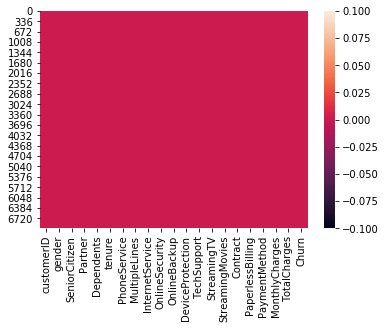

In [9]:
sns.heatmap(df.isnull())
plt.show()

## Statistical Summary

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#Checking correlation
df.corr()



,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


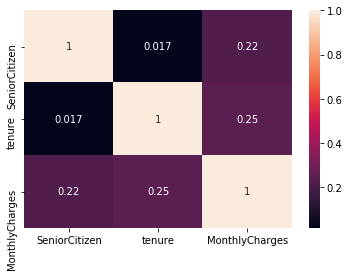

In [12]:
sns.heatmap(df.corr(),cmap='rocket',annot=True)

Finding:
    1.Monthly charges are positively correlated to tenure and senior citizen.
    2.Senior citizen is negatively correlated to tenure.
    

Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22


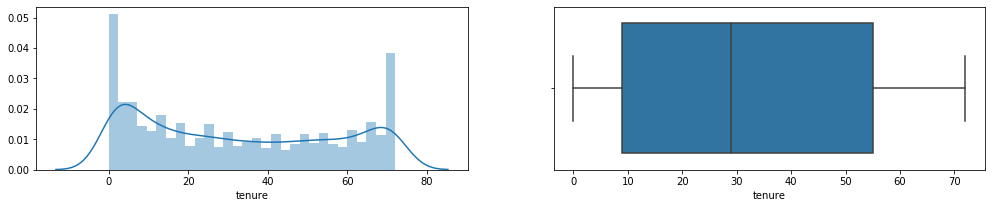

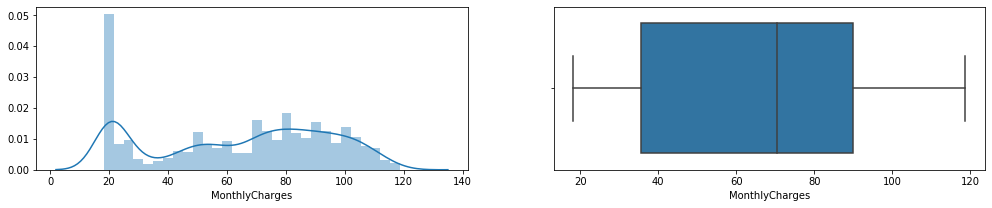

In [13]:
#Analysis of numerical features

for i in ['tenure','MonthlyCharges']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

### Exploratory Data Analysis

In [14]:
for i in df.columns:
    print(i)
    print('num of unique values -->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('*********************************************')

customerID
num of unique values --> 7043
count           7043
unique          7043
top       9787-XVQIU
freq               1
Name: customerID, dtype: object
*********************************************
gender
num of unique values --> 2
['Female' 'Male']
*********************************************
SeniorCitizen
num of unique values --> 2
[0 1]
*********************************************
Partner
num of unique values --> 2
['Yes' 'No']
*********************************************
Dependents
num of unique values --> 2
['No' 'Yes']
*********************************************
tenure
num of unique values --> 73
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
*********************************************
PhoneService
num of unique values --> 2
['No' 'Yes']
*********************************************
MultipleLines
num of unique values -->

In [15]:
#Senior Citizen

df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
df['SeniorCitizen'].replace({1:'Yes',0:'No'},inplace=True)
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['MultipleLines'].replace({'No phone service':'No'},inplace=True)
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['DeviceProtection'].replace({'No internet servive':'No'},inplace=True)
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df['TechSupport'].replace({'No internet service':'No'},inplace=True)
df['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#Contract
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [25]:
#Payment method
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [26]:
df['PaymentMethod'].replace({'Electronic check':'E-Cheque','Mailed check':'Mailed-Cheque',
                            'Bank transfer (automatic)':'Auto-Bank-Transfer','Credit card (automatic)':'Auto-CreditCard'},inplace=True)
df['PaymentMethod'].unique()

array(['E-Cheque', 'Mailed-Cheque', 'Auto-Bank-Transfer',
       'Auto-CreditCard'], dtype=object)

In [27]:
#Total charges
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
2623.65     1
3023.55     1
3425.35     1
2006.1      1
59.05       1
Name: TotalCharges, Length: 6531, dtype: int64

In [28]:
df=df[df['TotalCharges']!=' ']
df['TotalCharges']=df['TotalCharges'].astype(float)
df.shape

(7032, 21)

In [29]:
df.drop(columns=['customerID'],axis=1,inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

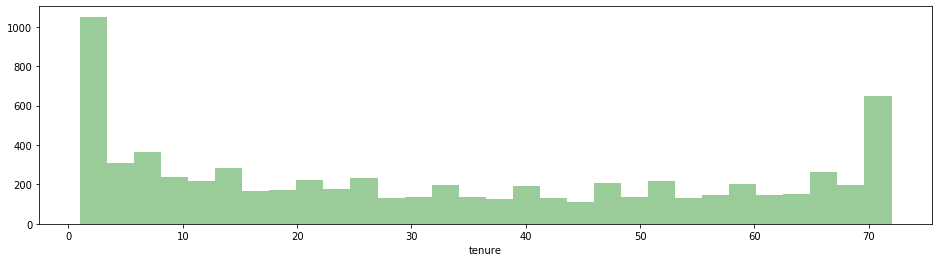

In [30]:
plt.figure(figsize=(16,4))
sns.distplot(df['tenure'],bins=30,kde=False,color='Green')

In [33]:
#Separating categorical and numerical columns

cat_df,num_df=[],[]
for i in df:
    if df[i].dtypes=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >',i)
    
print('Total number of features:',df.shape[1])
print('Number of Categorical features:',len(cat_df))
print('Number of Numerical features:',len(num_df))

Total number of features: 20
Number of Categorical features: 17
Number of Numerical features: 3


Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22
Skewness of TotalCharges = 0.96


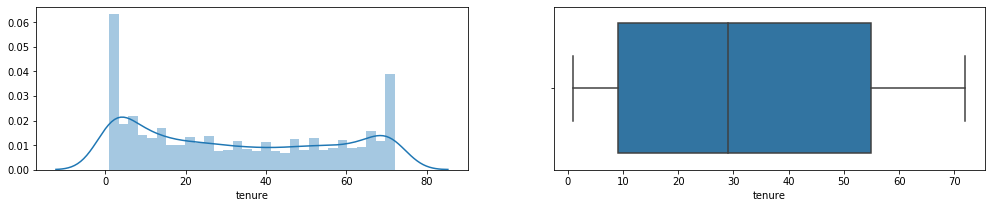

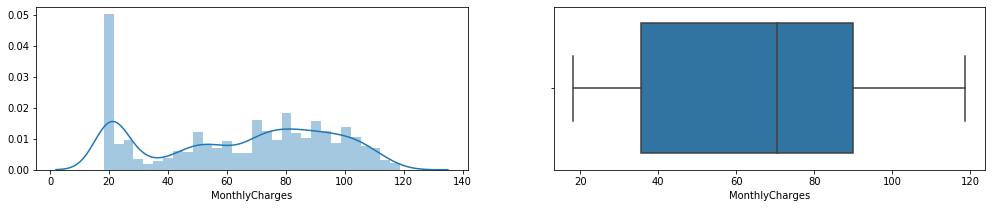

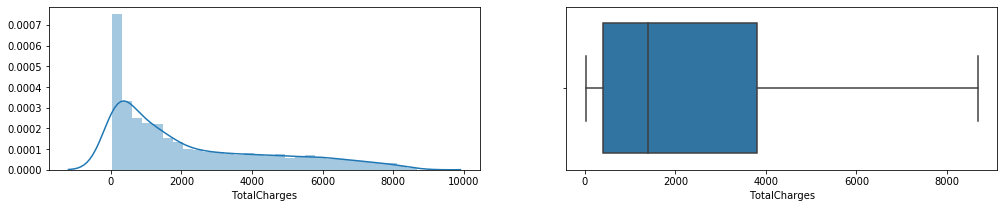

In [34]:
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

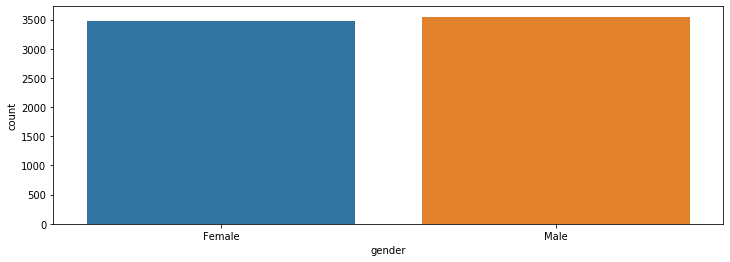

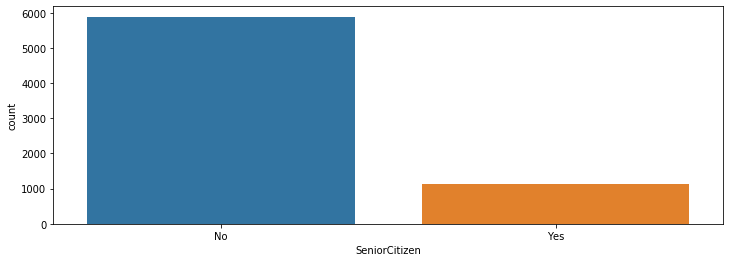

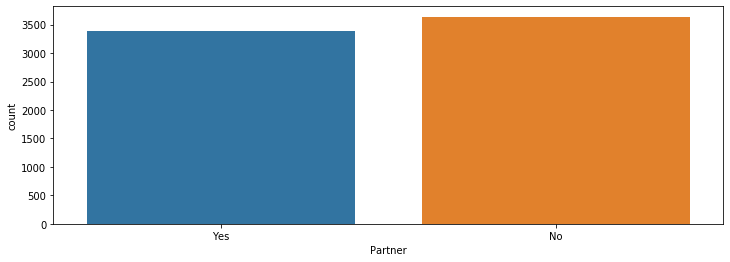

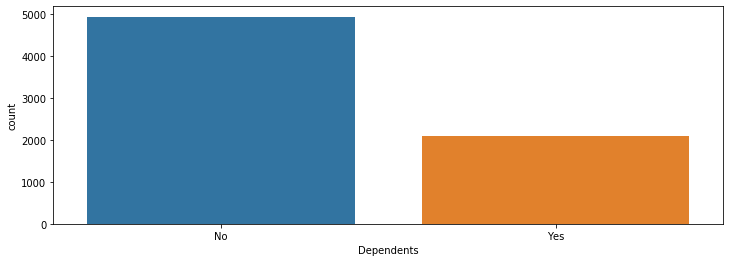

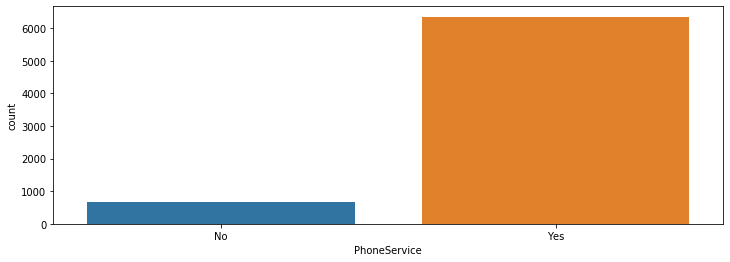

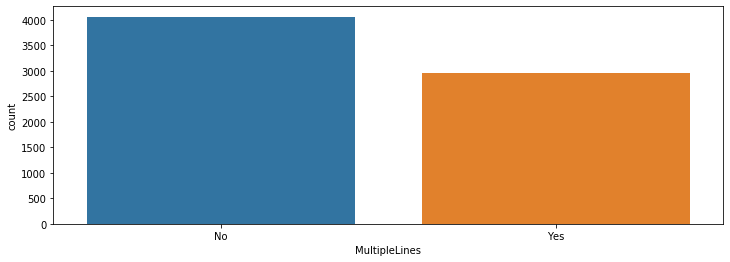

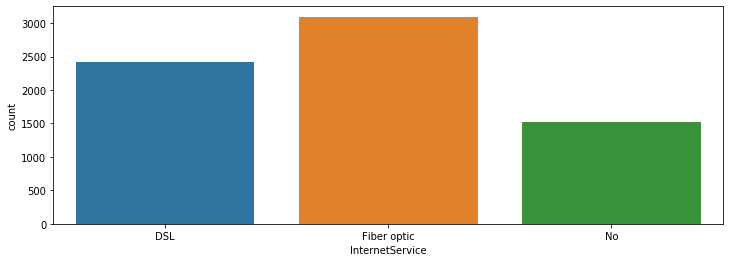

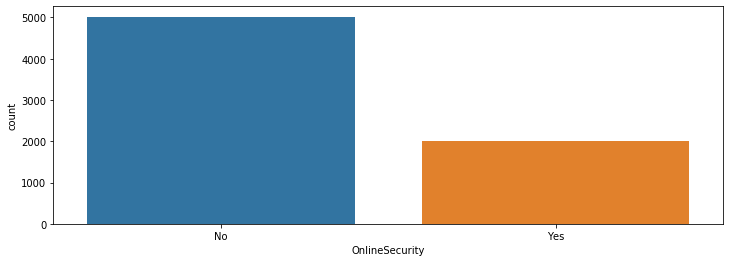

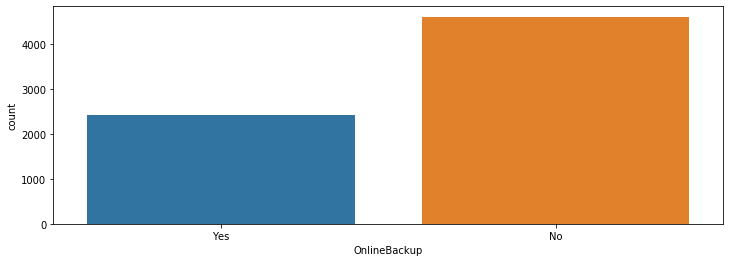

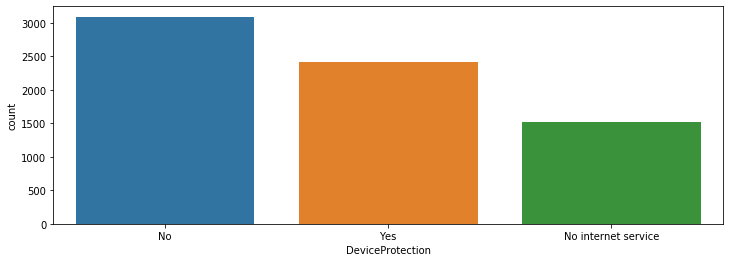

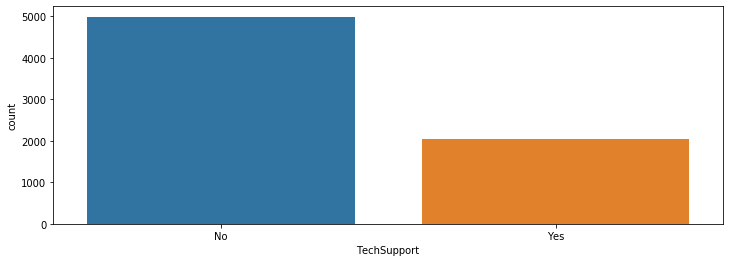

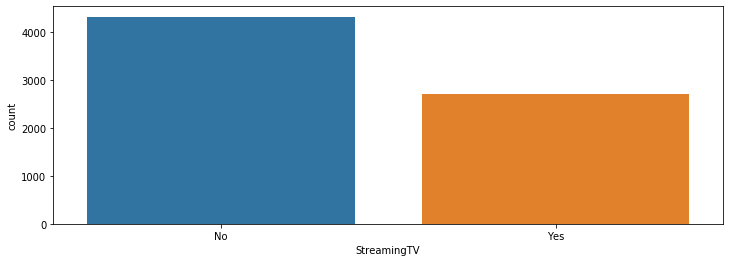

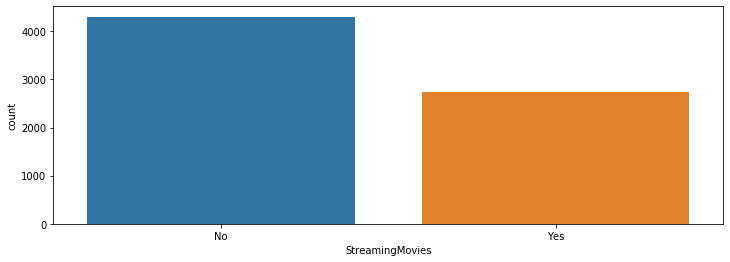

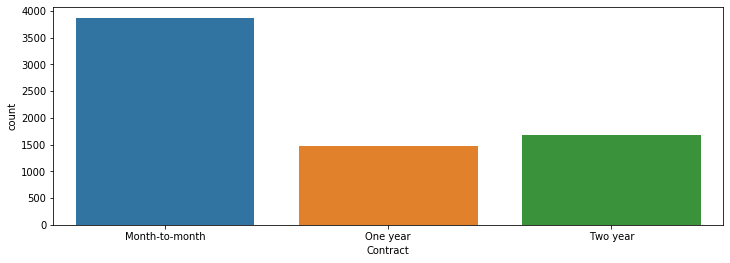

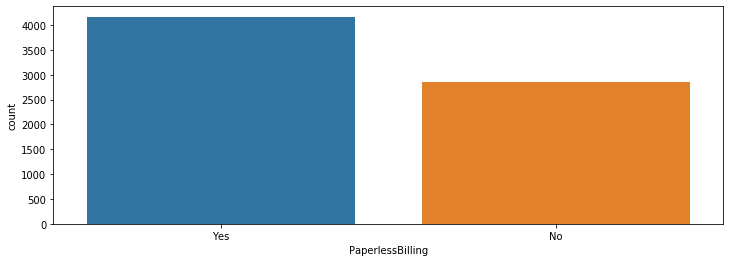

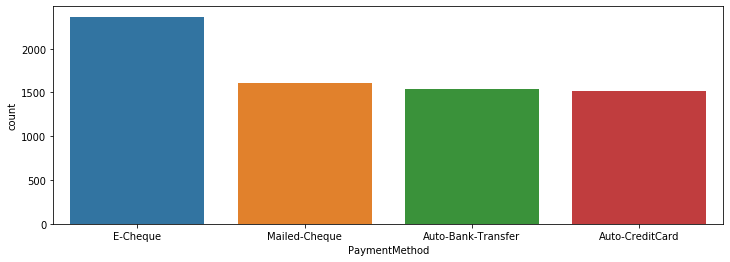

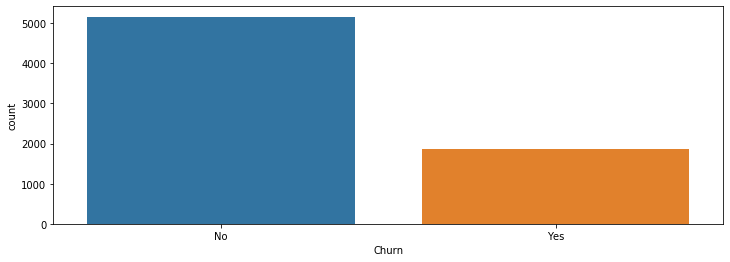

In [35]:
for i in cat_df:
    f=plt.figure(figsize=(12,4))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

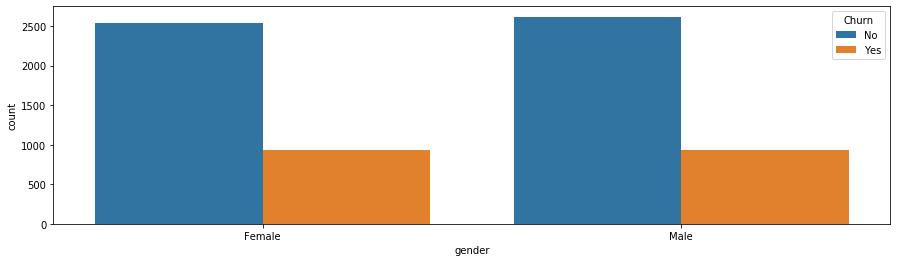

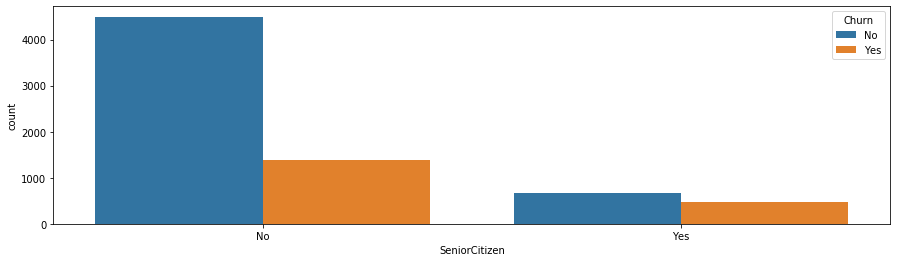

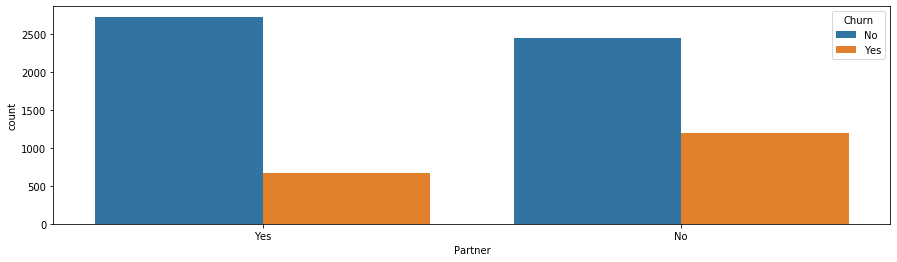

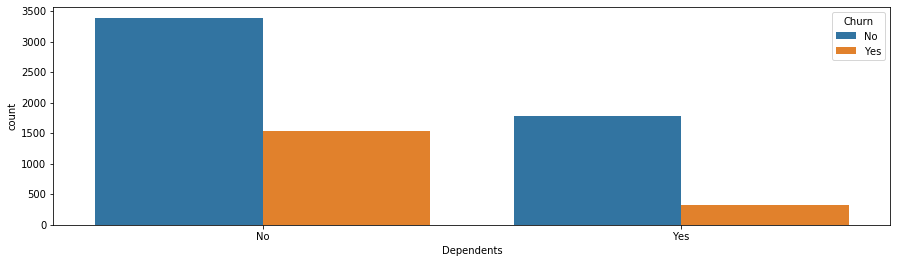

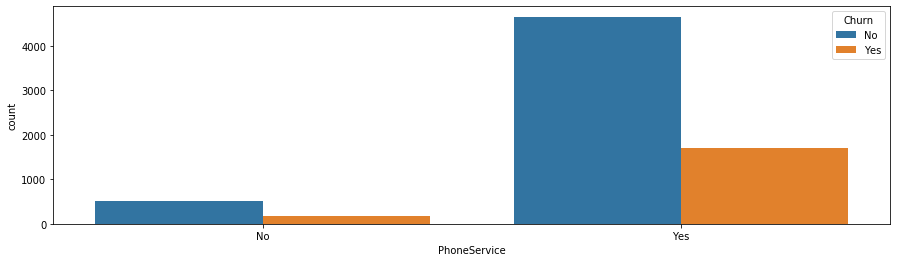

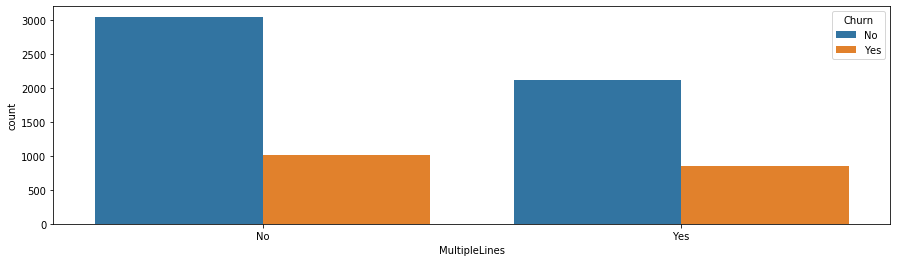

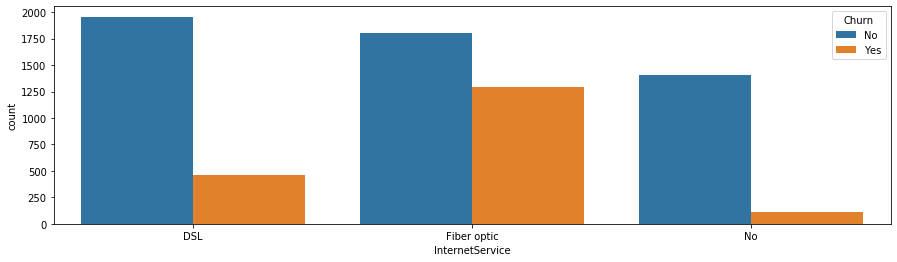

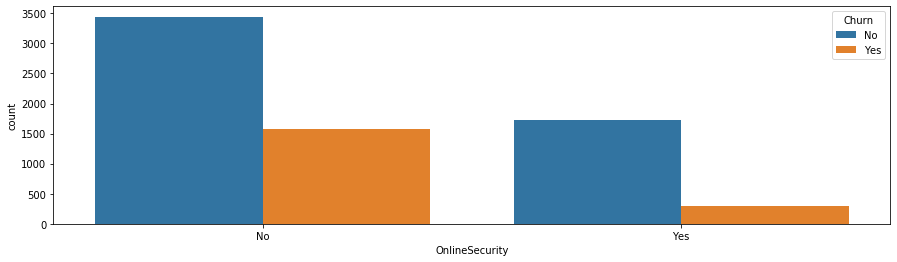

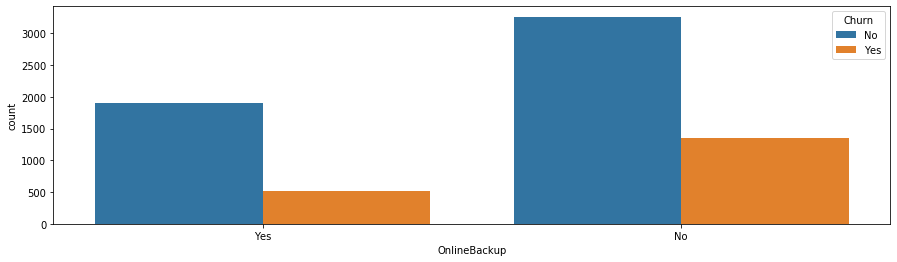

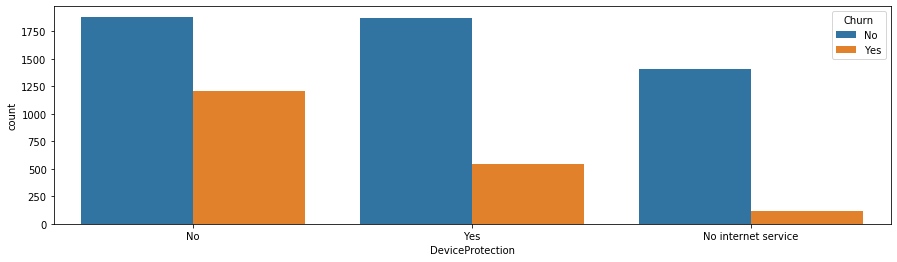

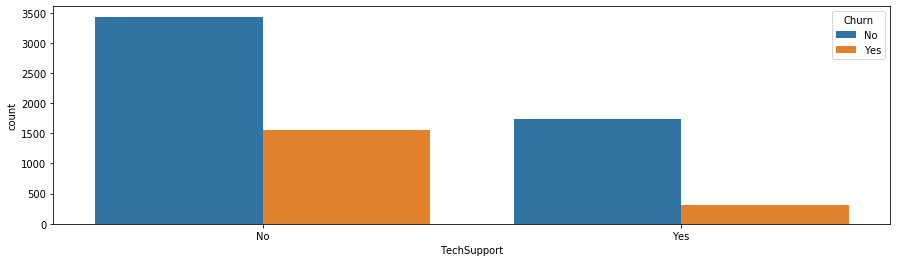

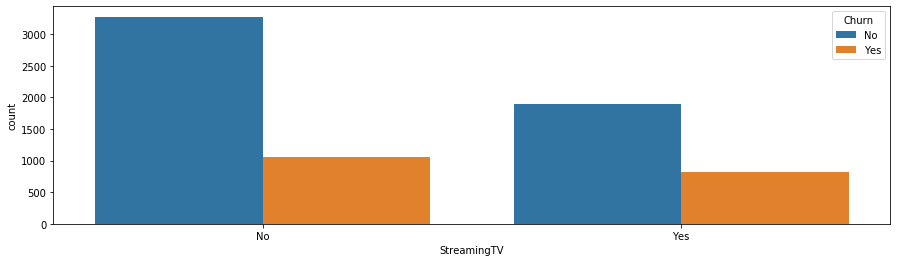

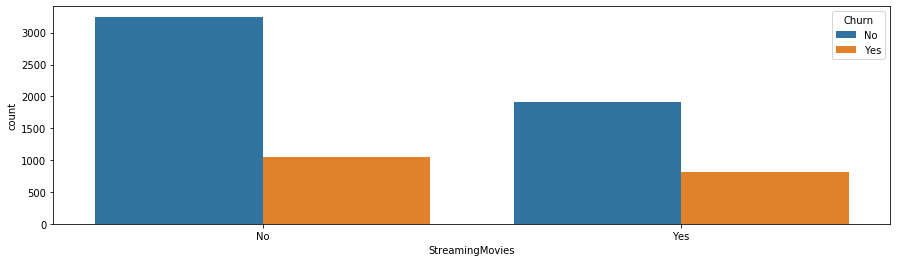

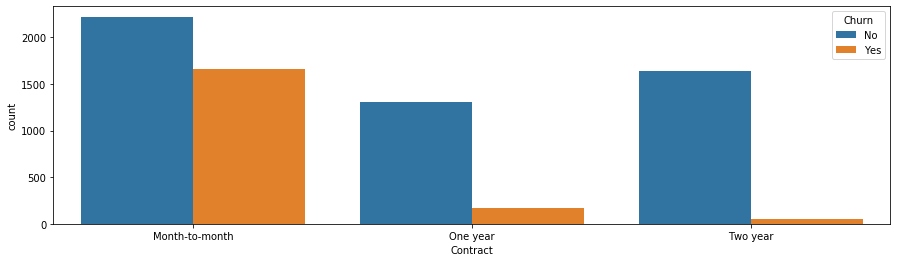

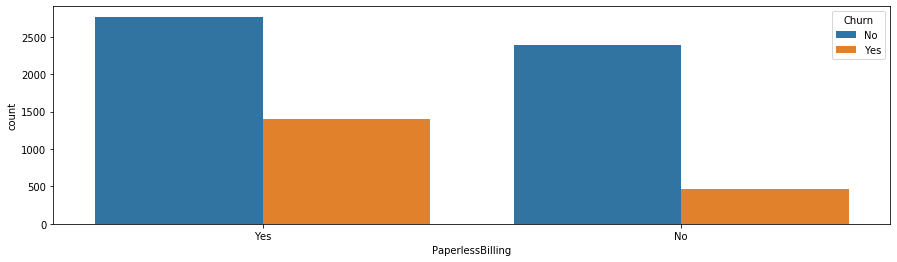

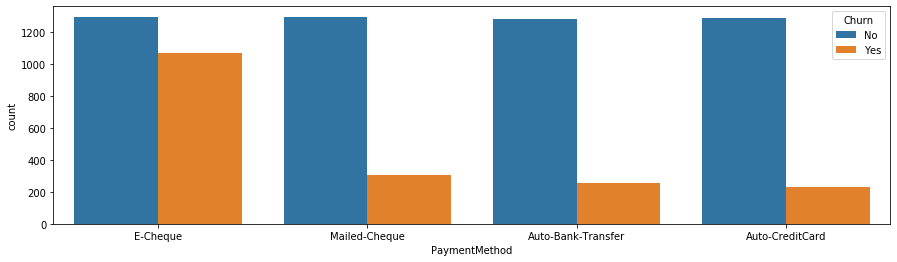

In [36]:
for i in [x for x in df.columns if x not in num_df + ['Churn']]:
    plt.figure(figsize=(15,4))
    sns.countplot(x=i,data=df,hue='Churn')

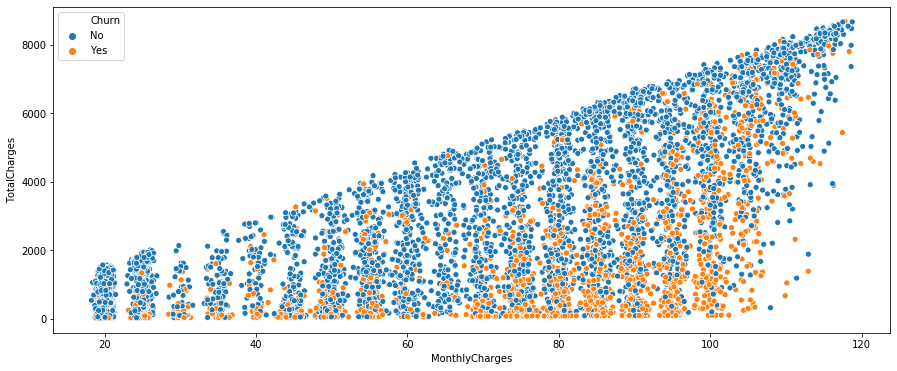

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

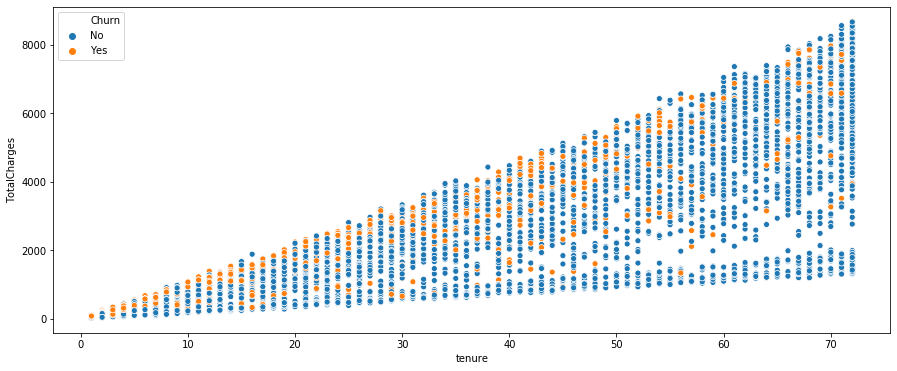

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='tenure',y='TotalCharges',hue='Churn',data=df)

Text(0, 0.5, '% of Churn')

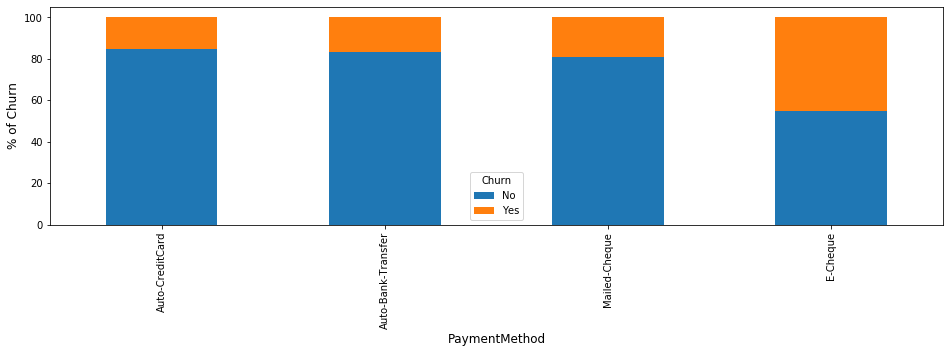

In [39]:
tbl=pd.crosstab(df['PaymentMethod'],df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

Text(0, 0.5, '% of StreamingTV')

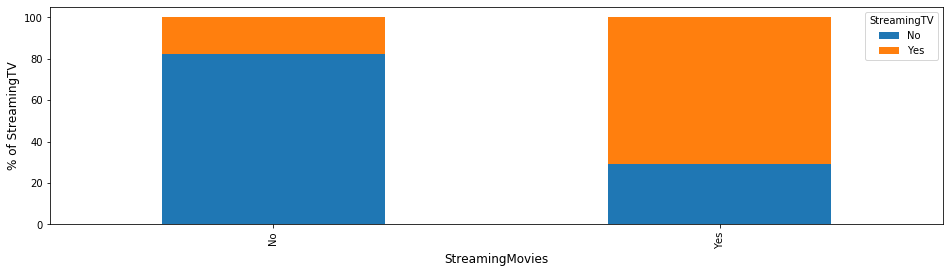

In [40]:
tbl=pd.crosstab(df['StreamingMovies'],df['StreamingTV'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('StreamingMovies',fontsize=12)
plt.ylabel('% of StreamingTV',fontsize=12)

Text(0, 0.5, '% of PaperlessBilling')

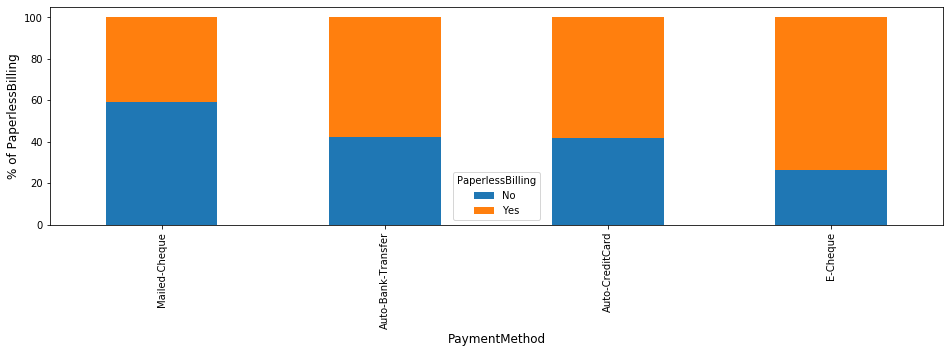

In [41]:
tbl=pd.crosstab(df['PaymentMethod'],df['PaperlessBilling'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of PaperlessBilling',fontsize=12)

Text(0, 0.5, '% of MultipleLines')

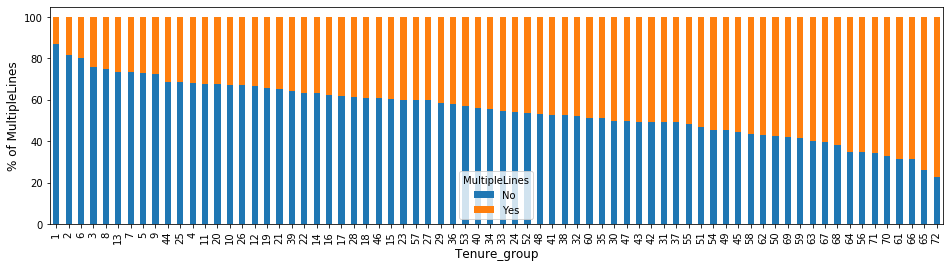

In [42]:
tbl=pd.crosstab(df['tenure'],df['MultipleLines'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Tenure_group',fontsize=12)
plt.ylabel('% of MultipleLines',fontsize=12)

Text(0, 0.5, '% of Churn')

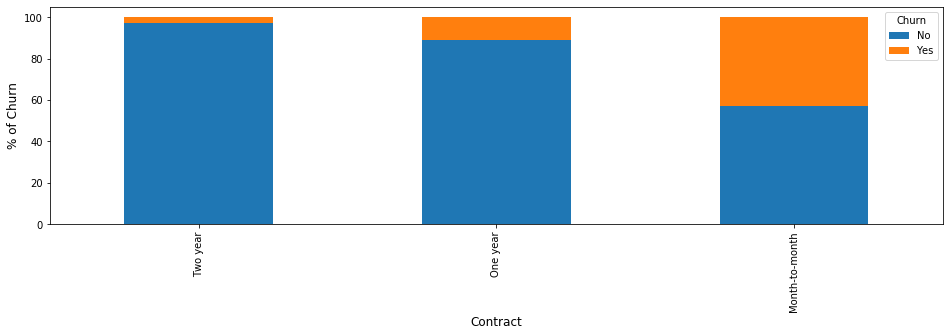

In [43]:
tbl=pd.crosstab(df['Contract'],df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Contract',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

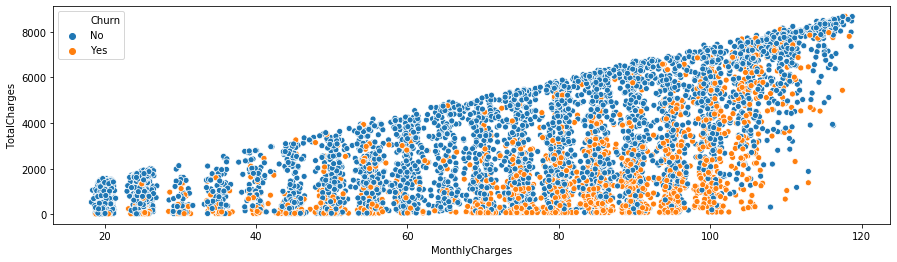

In [44]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

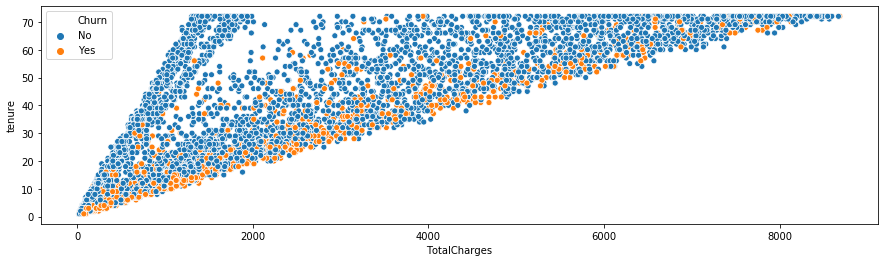

In [45]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)

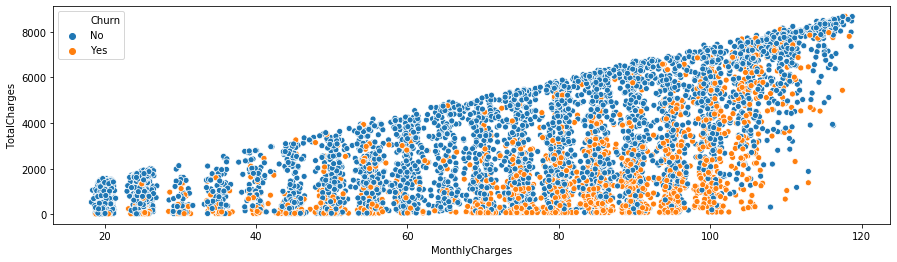

In [46]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

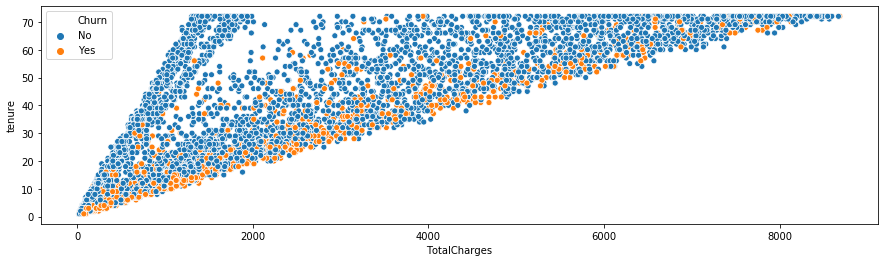

In [47]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Cheque,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed-Cheque,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed-Cheque,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Auto-Bank-Transfer,42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Cheque,70.70,151.65,Yes


In [49]:
#Converting categorical data into numerical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
col=['gender','SeniorCitizen','Partner','Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn']
for i in col:
    df[i]=le.fit_transform(df[i])

In [50]:
#Splitting input and target variables

x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [51]:
#Scale the data

ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [52]:
#Splitting the data into training and testing data sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [53]:
print(x_train.shape,'\t\t',x_test.shape)

(5625, 19) 		 (1407, 19)


In [54]:
print(y_train.shape,'\t\t',y_test.shape)

(5625,) 		 (1407,)


In [55]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [57]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 18}

In [58]:
KNN=KNeighborsClassifier(n_neighbors=18)

In [60]:
#Support Vector Classifier
from sklearn.svm import SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [61]:
SV=SVC(kernel='rbf',C=1)

In [64]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
criterion={'criterion':['gini','entropy']}
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'entropy'}

In [65]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [66]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
parameters={'n_estimators':range(100,200,300)}
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [67]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [68]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [69]:
#Extra Trees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [70]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [71]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [72]:
LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=18)
SV=SVC(kernel='rbf',C=1)
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [73]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***************** LogisticRegression *********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score= 0.7931769722814499


Cross val score= 0.8019059954092848


roc_auc_score= 0.7192772207008298


classification report:               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



[[906 127]
 [164 210]]





***************** GaussianNB *********************


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score= 0.73



accuracy score= 0.7768301350390903


Cross val score= 0.7852650572222941


roc_auc_score= 0.6868228150188175


classification report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



[[908 125]
 [189 185]]







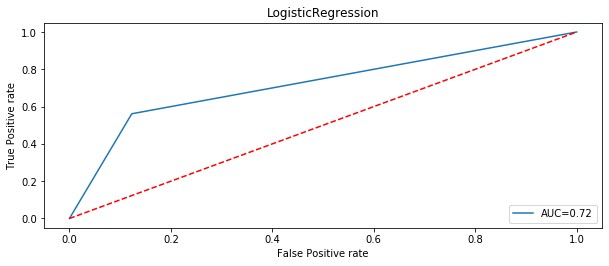

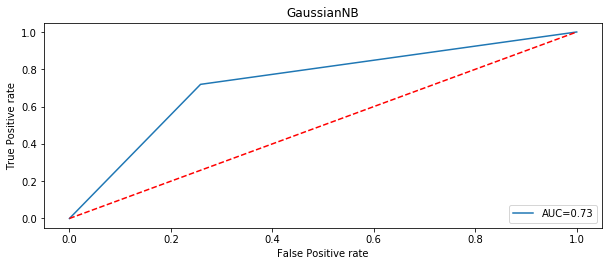

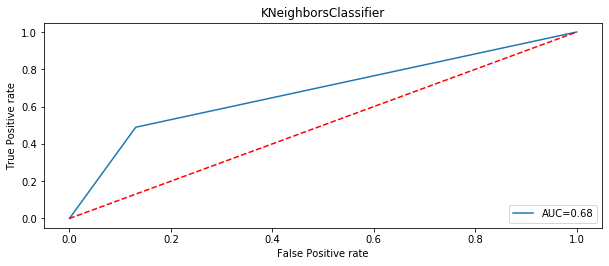

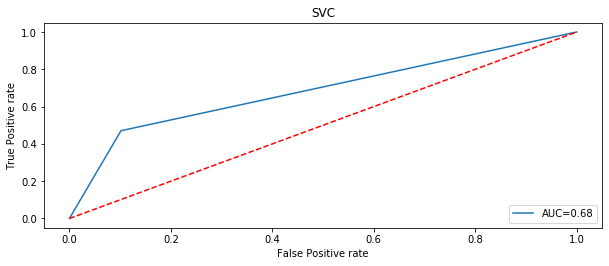

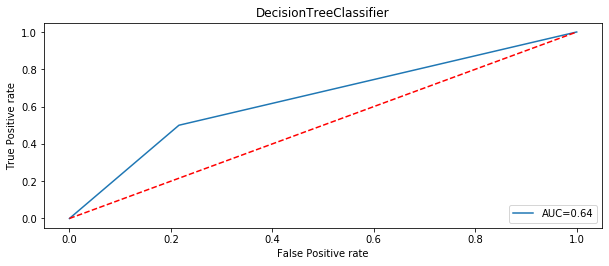

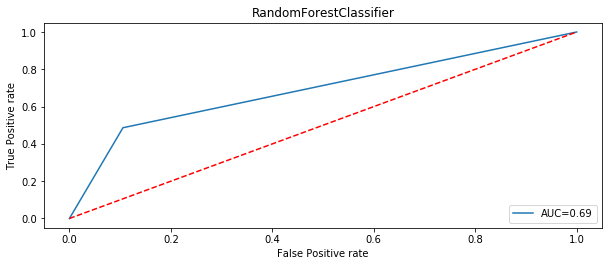

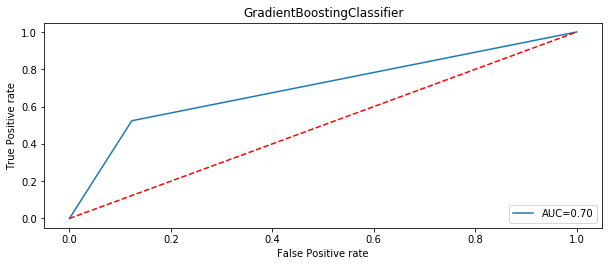

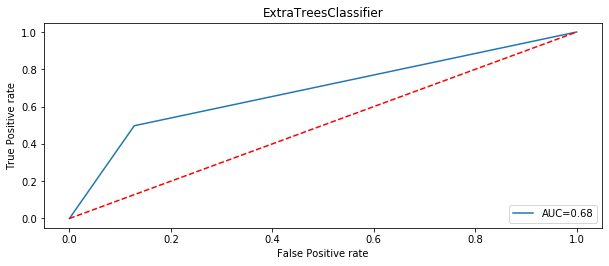

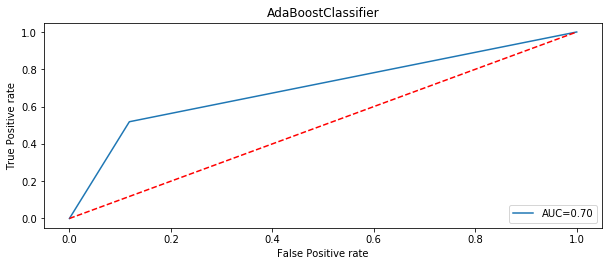

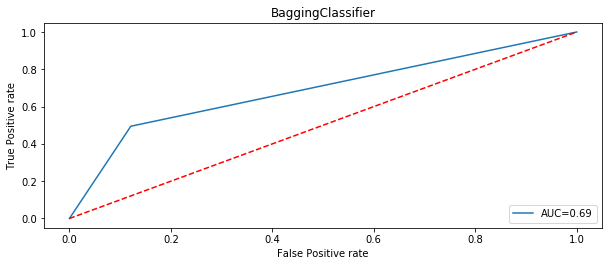

In [75]:
Model=[]
score=[]
CVS=[]
rocscore=[]

for name,model in models:
    print('*****************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('accuracy score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross val score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report:',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('False Positive rate')
    print('\n\n')

In [76]:
final=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':CVS,
                   'Roc_auc_curve':rocscore})
final

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,79.317697,80.190600,71.927722
1,GaussianNB,73.560768,75.640094,73.039043
2,KNeighborsClassifier,76.830135,78.142276,67.930875
3,SVC,78.464819,79.906165,68.447127
4,DecisionTreeClassifier,70.859986,73.236676,64.206196
5,RandomForestClassifier,78.606965,79.436647,69.055655
6,GradientBoostingClassifier,78.322672,79.962943,70.056064
7,ExtraTreesClassifier,77.256574,78.384299,68.477152
8,AdaBoostClassifier,78.535892,80.332584,70.030698
9,BaggingClassifier,77.683014,78.526506,68.682282


Conclusion:
    Highest accuracy is achieved through Logostic Regression with 79.31% accuracy.

In [77]:
#Save the model

import joblib
from joblib import dump

joblib.dump(LR,'LR_Telecom_customer_churn.pkl')

['LR_Telecom_customer_churn.pkl']

In [79]:
#Saving csv file of predicted data

df=pd.DataFrame(final)
df.to_csv('LR_Telecom_customer_churn.csv')